# Task 1

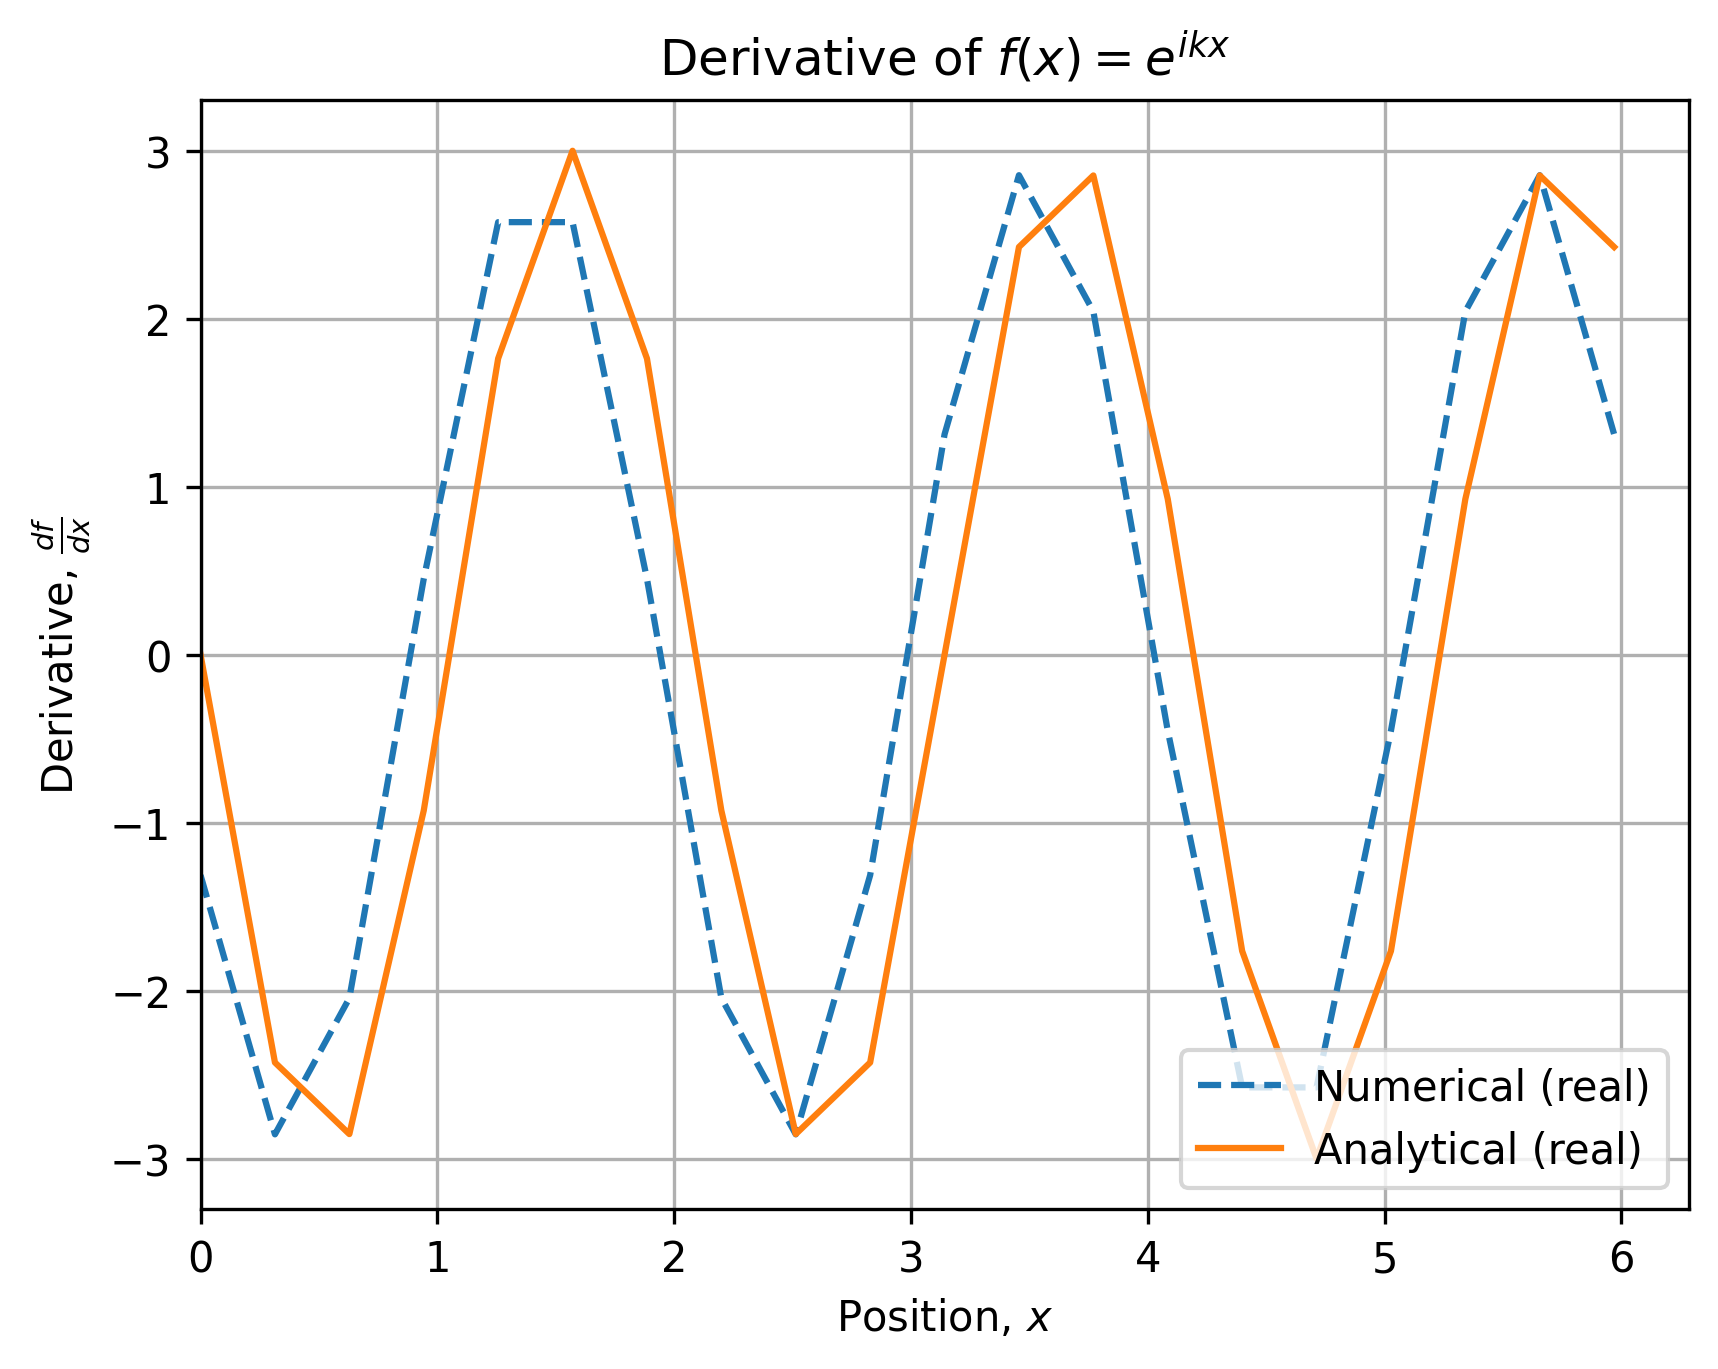

In [64]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Givens
# ------

N = 20
p = 2*math.pi

delta_x = p/N
x = np.arange(0, p, delta_x).transpose()

# Subtask a)
# ---------

# Create derivative matrix D for forward finite difference scheme
D = np.zeros((N, N))
for i in range(N):
    D[i][i] = -1
    D[i][(i+1)%N] = 1
D = D/delta_x

#print(D)

# Subtask c)
# ----------

k = 3

def f(x, k):
    return np.exp(1j*x*k)

df_dx_numerical = np.matmul(D ,f(x,k))
df_dx_analytical = 1j * k * f(x, k)

plt.figure(dpi=300)
plt.plot(x, np.real(df_dx_numerical), linestyle='dashed', label='Numerical (real)')
plt.plot(x, np.real(df_dx_analytical), label='Analytical (real)')
plt.xlim((0, p))
plt.legend(loc='lower right')
plt.title(r'Derivative of $f(x) = e^{ikx}$')
plt.xlabel(r'Position, $x$')
plt.ylabel(r'Derivative, $\frac{df}{dx}$')
plt.grid(True)

In [65]:
# Subtask d)
# ----------

mu = np.divide(df_dx_numerical,f(x, k))
print(f'mu={mu}')

k_mod = 1/ 1j / delta_x * (np.exp(1j * k * delta_x)-1)
print(f'k_mod = {k_mod}')

ik_mod = 1j * k_mod
print(f'i * k_mod = {ik_mod}')


mu=[-1.31212029+2.57518107j -1.31212029+2.57518107j -1.31212029+2.57518107j
 -1.31212029+2.57518107j -1.31212029+2.57518107j -1.31212029+2.57518107j
 -1.31212029+2.57518107j -1.31212029+2.57518107j -1.31212029+2.57518107j
 -1.31212029+2.57518107j -1.31212029+2.57518107j -1.31212029+2.57518107j
 -1.31212029+2.57518107j -1.31212029+2.57518107j -1.31212029+2.57518107j
 -1.31212029+2.57518107j -1.31212029+2.57518107j -1.31212029+2.57518107j
 -1.31212029+2.57518107j -1.31212029+2.57518107j]
k_mod = (2.5751810740024195+1.3121202942606287j)
i * k_mod = (-1.3121202942606287+2.5751810740024195j)


# Task 2

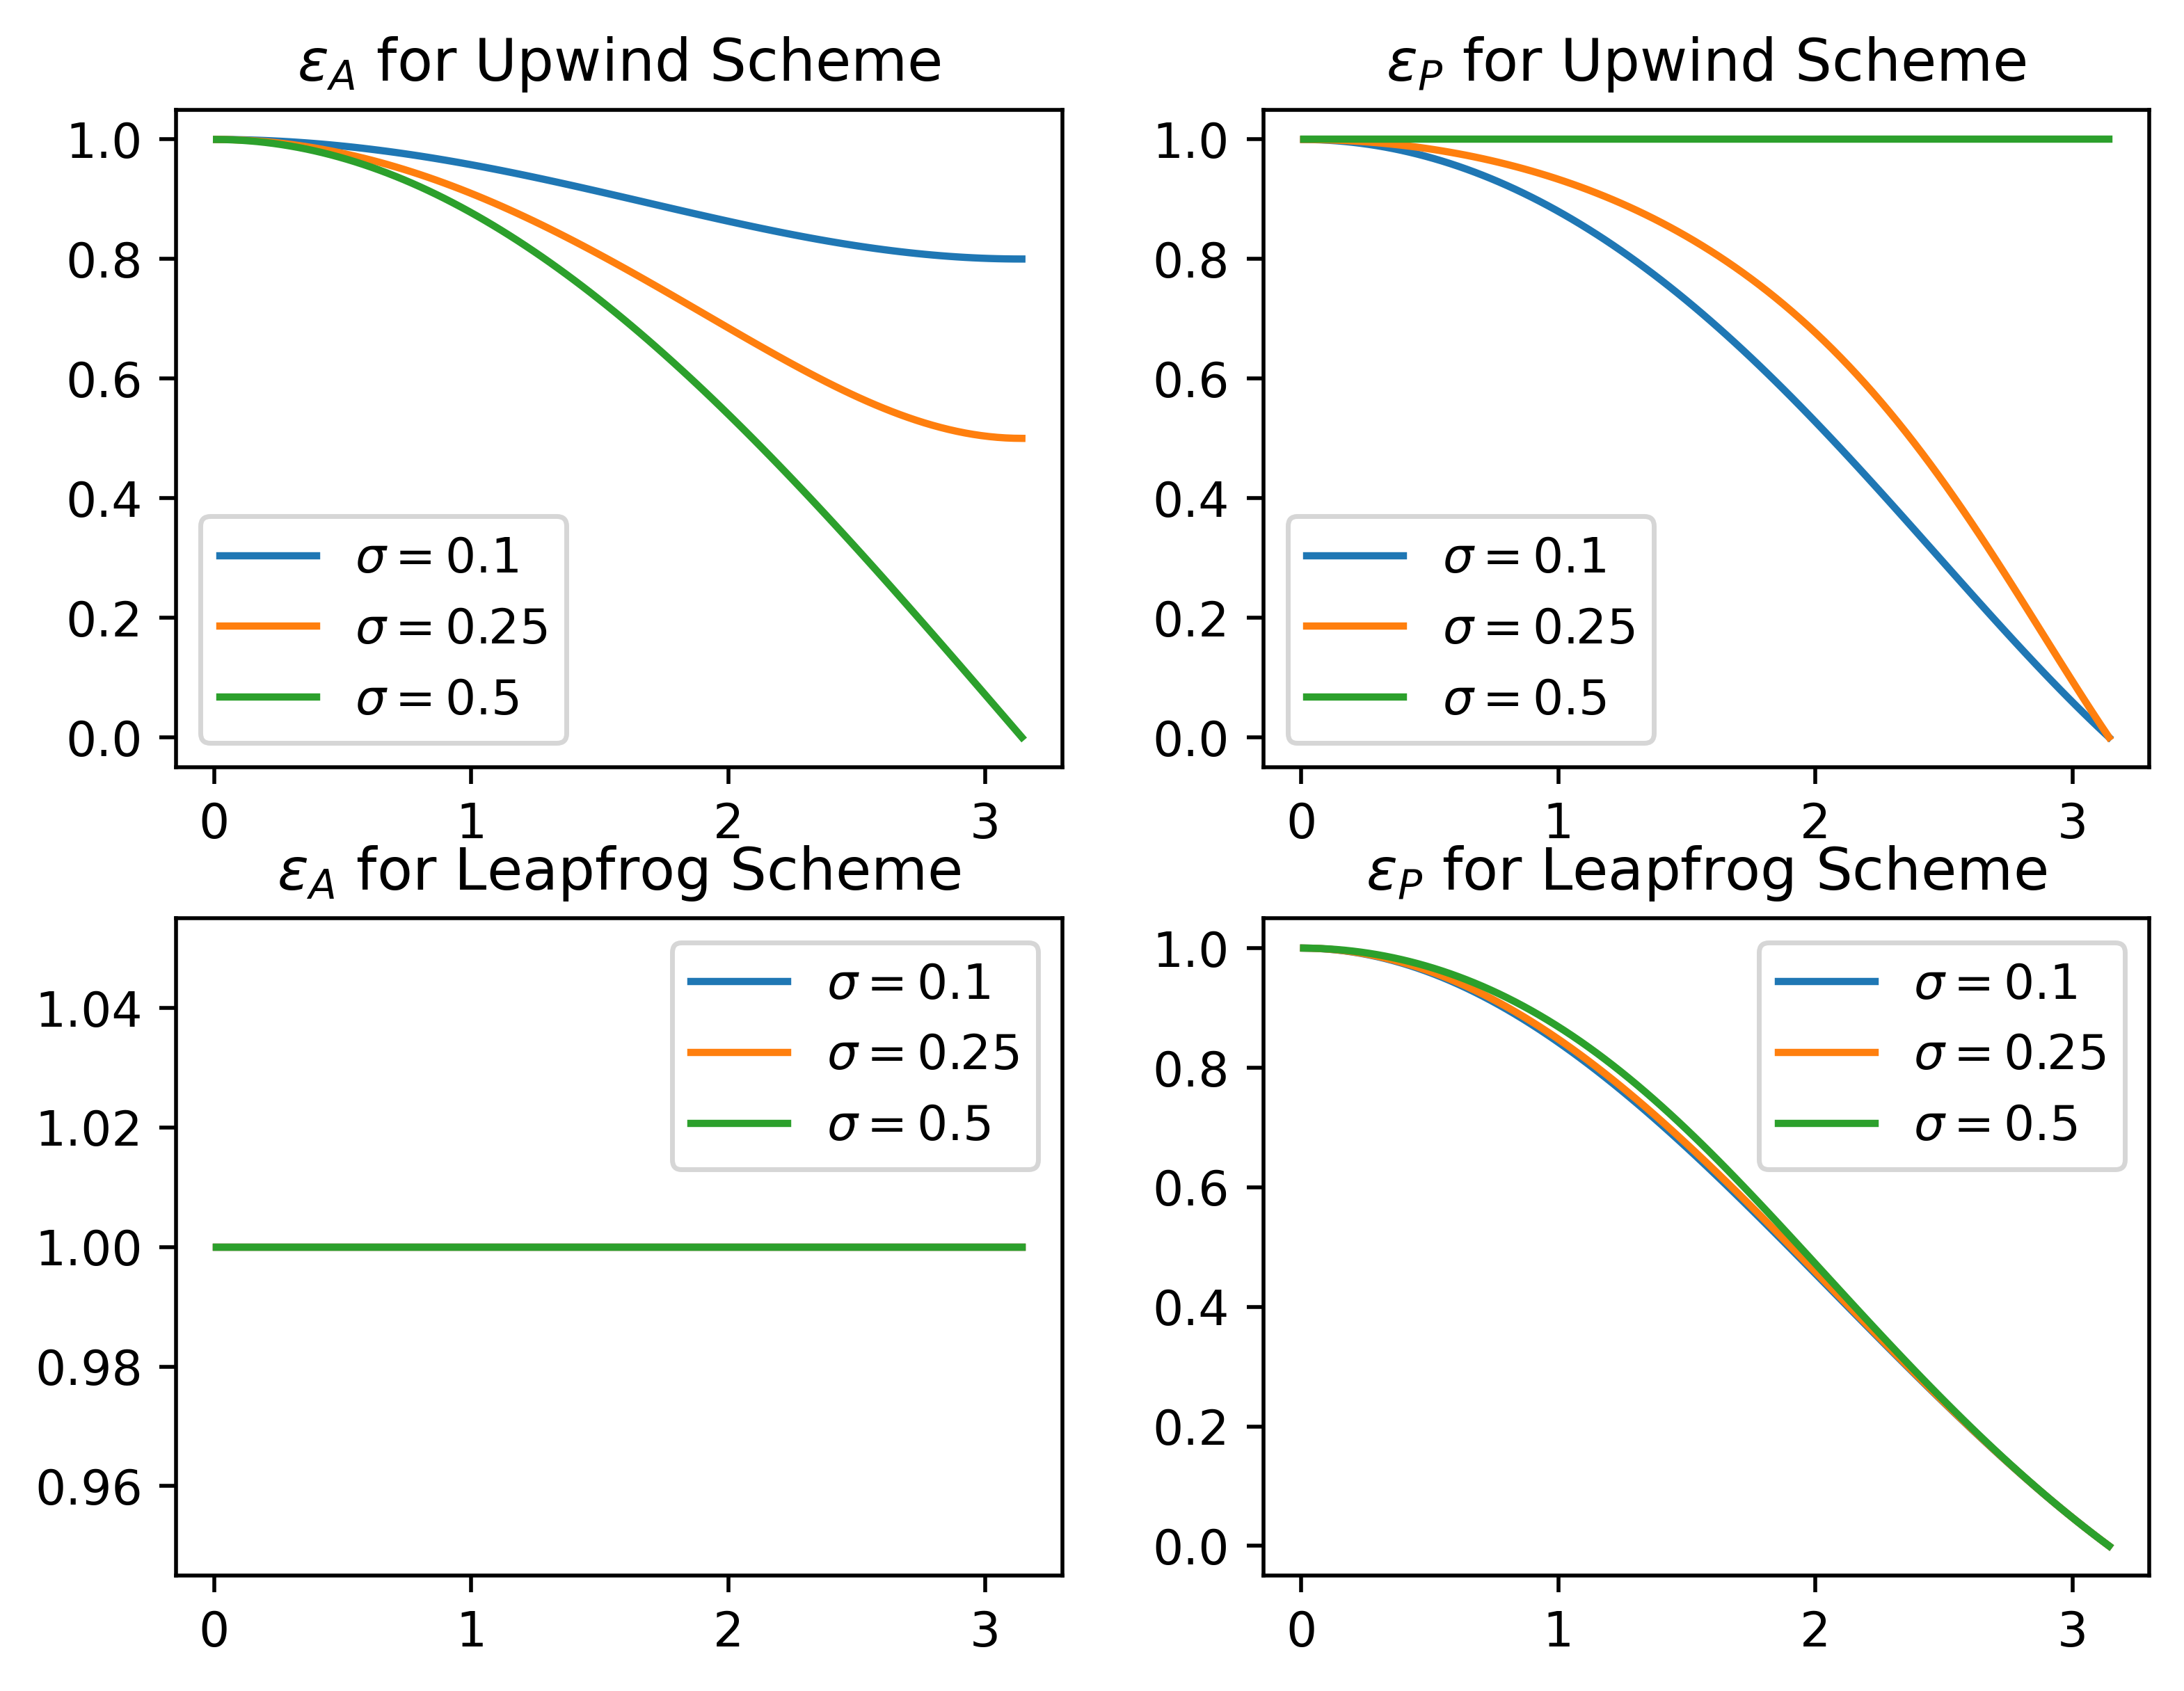

In [66]:
# Plot the amplitude and phase errors against phi

phi = np.linspace(0.01, np.pi, 100)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, dpi=500)
#plt.title("Comparison of Amplitude and Phase Error for Upwind and Leapfrog Discretion Schemes")
fig.tight_layout()

for sigma in [0.1, 0.25, 0.5]:
    e_A_upwind = np.sqrt(1+2*sigma*(np.cos(phi)-1)+2*sigma*sigma*(1-np.cos(phi)))
    ax1.plot(phi, e_A_upwind, label=r'$\sigma=$'+f'{sigma}')
    e_P_upwind = np.divide(np.atan2(sigma*np.sin(phi), 1-sigma+sigma*np.cos(phi)), sigma*phi)
    ax2.plot(phi, e_P_upwind, label=r'$\sigma=$'+f'{sigma}')
    e_A_leapfrog = np.ones(len(phi))
    ax3.plot(phi, e_A_leapfrog, label=r'$\sigma=$'+f'{sigma}')
    e_P_leapfrog = np.divide(np.atan2(sigma*np.sin(phi), np.sqrt(1-sigma*sigma*np.sin(phi)*np.sin(phi))), sigma*phi)
    ax4.plot(phi, e_P_leapfrog, label=r'$\sigma=$'+f'{sigma}')

ax1.set_title(r'$\varepsilon _A$ for Upwind Scheme')
ax2.set_title(r'$\varepsilon _P$ for Upwind Scheme')
ax3.set_title(r'$\varepsilon _A$ for Leapfrog Scheme')
ax4.set_title(r'$\varepsilon _P$ for Leapfrog Scheme')
for ax in [ax1, ax2, ax3, ax4]:
    ax.legend()
plt.show()